### <font color='blue'>Objetivo do Projeto: Criar um Modelo XGBoost Para Prever Fraude em Transações de Cartão de Crédito</font>

Link do dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### <font color='blue'>Instalando e Carregando os Pacotes</font>

In [1]:
# Imports
import joblib
import numpy as np 
import pandas as pd 
import sklearn
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

### <font color='blue'>Carregando e Limpando os Dados</font>

In [2]:
# Carrega os dados
df = pd.read_csv('creditcard.csv')

In [3]:
# Opção para mostrar todas as colunas do dataset
pd.set_option('display.max_columns', None)

In [4]:
# Primeiros registros do df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Obs: Os dados estão anonimizados. Dados anonimizados são aqueles que foram irreversivelmente modificados, de forma que não possam mais ser ligados a uma pessoa específica, mesmo com o uso de tecnologias razoáveis. Bancos utilizam dados anonimizados em datasets para proteger a privacidade dos clientes, cumprindo regulamentações como a LGPD, e ainda assim, realizar análises estatísticas e melhorar seus serviços sem comprometer informações sensíveis. Sendo assim todas as variáveis que estão com V no nome estão anonimizadas.

In [5]:
# Shape
df.shape

(284807, 31)

In [6]:
# Variável alvo
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Ajustando o nome das colunas
df.columns = [col.lower() for col in df.columns]

In [9]:
# Seleciona os atributos filtrando as colunas que serão removidas e a variável alvo
atributos = [x for x in df.columns if x != 'class']

In [10]:
atributos

['time',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'amount']

In [11]:
# Verificando valores únicos
valores_unicos = df.nunique()

In [12]:
valores_unicos

time      124592
v1        275663
v2        275663
v3        275663
v4        275663
v5        275663
v6        275663
v7        275663
v8        275663
v9        275663
v10       275663
v11       275663
v12       275663
v13       275663
v14       275663
v15       275663
v16       275663
v17       275663
v18       275663
v19       275663
v20       275663
v21       275663
v22       275663
v23       275663
v24       275663
v25       275663
v26       275663
v27       275663
v28       275663
amount     32767
class          2
dtype: int64

In [13]:
# Verificando se há valores ausentes
valores_ausentes = df.isna().sum()
print(valores_ausentes[valores_ausentes > 1])

Series([], dtype: int64)


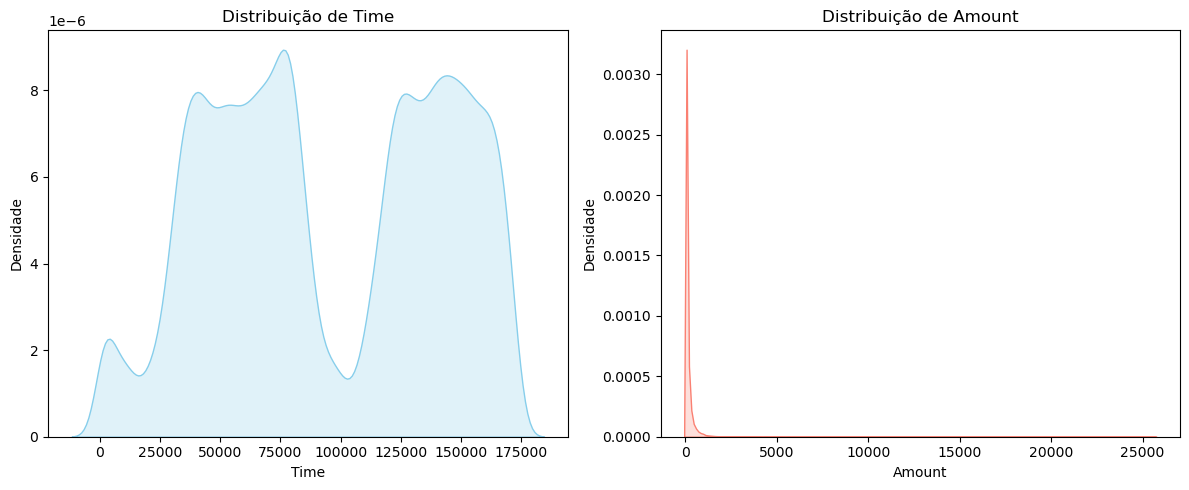

In [14]:
# Verificando a distribuição das variáveis Time e Amount

# Criar a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de densidade para 'Time'
sns.kdeplot(df['time'], ax=ax1, fill=True, color='skyblue')  #Preenchimento da área sob a curva para melhor visualização
ax1.set_title('Distribuição de Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Densidade')

# Gráfico de densidade para 'Amount'
sns.kdeplot(df['amount'], ax=ax2, fill=True, color='salmon') #Preenchimento da área sob a curva para melhor visualização
ax2.set_title('Distribuição de Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Densidade')

plt.tight_layout()
plt.show()

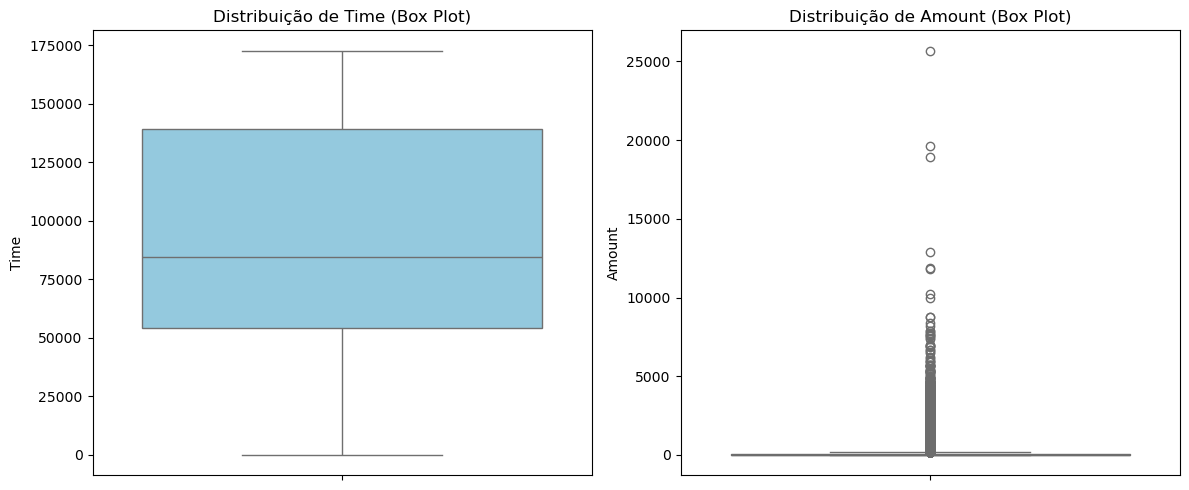

In [15]:
# Verificando as variáveis com boxplot

# Criar a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


# Box plot para 'Time'
sns.boxplot(y=df['time'], ax=ax1, color='skyblue') # y= para plotar na vertical
ax1.set_title('Distribuição de Time (Box Plot)')
ax1.set_ylabel('Time')


# Box plot para 'Amount'
sns.boxplot(y=df['amount'], ax=ax2, color='salmon') # y= para plotar na vertical
ax2.set_title('Distribuição de Amount (Box Plot)')
ax2.set_ylabel('Amount')


plt.tight_layout()
plt.show()

### <font color='blue'>Criação do Pipeline de Pré-Processamento</font>

**BaseEstimator**: Esta é a classe base para todos os estimadores no scikit-learn. Um estimador é qualquer objeto que pode estimar alguns parâmetros baseados em um conjunto de dados. Por exemplo, um algoritmo de Machine Learning como uma regressão linear ou uma árvore de decisão é um estimador. A classe BaseEstimator fornece funcionalidades básicas, como métodos para configurar os parâmetros de um estimador e para obter esses parâmetros com get_params() e set_params(). 
>
**TransformerMixin**: Esta é uma classe mista (mixin) usada para adicionar funcionalidade de transformação a um estimador. No scikit-learn, um "transformador" é um tipo de estimador que pode transformar um conjunto de dados. Por exemplo, ele pode ser usado para normalizar ou padronizar dados, selecionar ou extrair características, etc. A classe TransformerMixin adiciona o método fit_transform(), que é um método conveniente que primeiro ajusta o transformador ao conjunto de dados (usando fit()) e então aplica a transformação ao mesmo conjunto de dados (usando transform()). Isso é útil para evitar ter que chamar fit() e transform() separadamente durante o pré-processamento dos dados.

A combinação dessas duas classes é frequentemente usada ao criar um estimador personalizado ou transformador com o scikit-learn. Ao herdar dessas classes, você garante que seu estimador personalizado se integre bem com outras funcionalidades de scikit-learn, como pipelines e outras ferramentas de modelagem.

In [16]:
# Definição de uma classe personalizada que herda de BaseEstimator e TransformerMixin
class PipeSteps(BaseEstimator, TransformerMixin):

    # Método construtor para inicializar a classe com uma lista de colunas
    def __init__(self, columns=[]):
        
        # Atribuição do argumento columns ao atributo de instância self.columns
        self.columns = columns

    # Método fit usado para ajustar (treinar) a transformação nos dados de treinamento
    def fit(self, X, y = None):
        
        # Retorna a própria instância, indicando que o método não faz modificações
        return self

    # Método transform para transformar os dados de entrada
    def transform(self, X):
        
        # Faz uma cópia dos dados de entrada para evitar alterar os dados originais
        X = X.copy()
        
        # Retorna os dados sem modificações
        return X

In [17]:
# Definição de uma classe que herda de DSAPipeSteps
class SelecionaColunas(PipeSteps):

    # Método transform para transformar os dados de entrada
    def transform(self, X):
        
        # Faz uma cópia dos dados de entrada para evitar alterar os dados originais
        X = X.copy()
        
        # Seleciona e retorna apenas as colunas especificadas em self.columns
        return X[self.columns]

In [18]:
# Definição de uma classe que herda de DSAPipeSteps
class PreencheDados(PipeSteps):

    # Método fit para ajustar a transformação nos dados de treinamento
    def fit(self, X, y = None):
        
        # Calcula a média de cada coluna especificada em self.columns e armazena no dicionário self.means
        self.means = { col: X[col].mean() for col in self.columns }
        
        # Retorna a própria instância, indicando que o método não faz modificações
        return self

    # Método transform para transformar os dados de entrada
    def transform(self, X):
        
        # Faz uma cópia dos dados de entrada para evitar alterar os dados originais
        X = X.copy()
        
        # Itera sobre cada coluna especificada em self.columns
        for col in self.columns:
            
            # Preenche valores ausentes na coluna com a média calculada na fase de ajuste
            X[col] = X[col].fillna(self.means[col])
        
        # Retorna os dados transformados
        return X

In [19]:
# Definição de uma classe que herda de DSAPipeSteps
class PadronizaDados(PipeSteps):

    # Método fit para ajustar o scaler nos dados de treinamento
    def fit(self, X, y = None):
        
        # Inicializa uma instância de StandardScaler para padronizar os dados
        self.scaler = StandardScaler()
        
        # Ajusta o scaler nas colunas especificadas em self.columns
        self.scaler.fit(X[self.columns])
        
        # Retorna a própria instância, indicando que o método não faz modificações
        return self

    # Método transform para transformar os dados de entrada
    def transform(self, X):
        
        # Faz uma cópia dos dados de entrada para evitar alterar os dados originais
        X = X.copy()
        
        # Aplica a transformação de padronização nas colunas especificadas
        X[self.columns] = self.scaler.transform(X[self.columns])
        
        # Retorna os dados transformados
        return X

Pipeline no scikit-learn é uma ferramenta que encadeia várias etapas de transformação e um estimador final em um único objeto. Isso permite que você configure um processo de Machine Learning que inclui etapas de pré-processamento (como normalização, padronização e extração de características) seguidas pela aplicação de um modelo de aprendizado de máquina. Cada etapa da pipeline é representada por uma tupla contendo um nome e um objeto de transformação ou modelo.

In [20]:
# Cria o pipeline de pré-processamento
pipe_prepropcessamento = Pipeline([('feature_selection', SelecionaColunas(atributos)),
                                   ('fill_missing', PreencheDados(atributos)),
                                   ('standard_scaling', PadronizaDados(atributos))])

### <font color='blue'>Criação do Pipeline de Machine Learning</font>

In [21]:
# Cria o pipeline de Machine Learning
pipe_final = Pipeline([
                       ('preprocessing', pipe_prepropcessamento),
                       ('learning', XGBClassifier(random_state = 42, eval_metric = 'auc', objective = 'binary:logistic') )
                     ])

O trecho de código acima cria um pipeline de Machine Learning usando a biblioteca scikit-learn e o modelo XGBClassifier do XGBoost. Um pipeline no contexto de Machine Learning é uma maneira de encapsular sequencialmente etapas de pré-processamento e modelagem para que possam ser executadas como uma única unidade. Isso facilita tanto a execução quanto a manutenção do código. Vamos detalhar cada parte:

**Pipeline**: A classe Pipeline é uma ferramenta do scikit-learn que ajuda a sequenciar transformações e um estimador final. O pipeline executa as etapas em sequência, passando a saída de uma etapa como entrada para a próxima.

**Preprocessing ('preprocessing')**: Este é o primeiro estágio do pipeline, marcado pelo nome 'preprocessing'. Aqui, dsa_pipe_preprocessamento é o outro pipeline que você definiu anteriormente. Esse estágio é responsável por preparar e limpar os dados, aplicando transformações como normalização, codificação de variáveis categóricas, tratamento de valores ausentes, entre outras operações de pré-processamento necessárias.

**Learning ('learning')**: Este é o estágio final do pipeline, onde o modelo de Machine Learning é definido. Neste caso, estamos utilizando o XGBClassifier, um modelo baseado em gradient boosting do pacote XGBoost, que é amplamente usado para problemas de classificação.

**random_state = 42**: Garante a reprodutibilidade dos resultados ao fixar a semente do gerador de números aleatórios.

**eval_metric = 'auc'**: Define a métrica de avaliação do modelo durante o treinamento. AUC (área sob a curva ROC) é uma métrica comum para classificação binária.

**objective = 'binary:logistic'**: Especifica que o objetivo é realizar classificação binária com saída de probabilidade logística.

### <font color='blue'>Preparação dos Dados</font>

In [22]:
# Variáveis de entrada
X = df[atributos]

In [23]:
# Variável de saída
y = df['class']

In [24]:
# Divide os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.30, random_state = 42)

### <font color='blue'>Treinamento e Avaliação do Modelo</font>

In [25]:
# Treino do modelo
pipe_final.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('feature_selection',
                                  SelecionaColunas(columns=['time', 'v1', 'v2',
                                                            'v3', 'v4', 'v5',
                                                            'v6', 'v7', 'v8',
                                                            'v9', 'v10', 'v11',
                                                            'v12', 'v13', 'v14',
                                                            'v15', 'v16', 'v17',
                                                            'v18', 'v19', 'v20',
                                                            'v21', 'v22', 'v23',
                                                            'v24', 'v25', 'v26',
                                                            'v27', 'v28',
                                                            'amount'])),
                                 ('fill_missing',
                                  PreencheDados(columns=['time', 'v1', 'v2',
                                                         'v3', 'v4', 'v5', 'v6',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [26]:
# Previsões com dados de teste
previsoes_teste = pipe_final.predict(X_teste)

In [27]:
# Calcula a métrica AUC
score_auc = metrics.roc_auc_score(y_teste, previsoes_teste)

In [28]:
print(f'AUC nos Dados de Teste - {score_auc:,.2%}')

AUC nos Dados de Teste - 90.80%


A Área Sob a Curva (AUC, na sigla em inglês) é uma métrica usada para avaliar o desempenho de modelos de classificação binária. Ela é baseada na curva ROC (Receiver Operating Characteristic), que é um gráfico que mostra a relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (1 - especificidade) para diferentes limiares de decisão.

A AUC representa a área total sob a curva ROC e pode variar de 0 a 1. Uma AUC de 0,5 indica um desempenho aleatório, enquanto uma AUC de 1,0 indica uma classificação perfeita. Portanto, quanto mais próximo de 1 for o valor da AUC, melhor será a capacidade do modelo de distinguir entre as classes positivas e negativas.

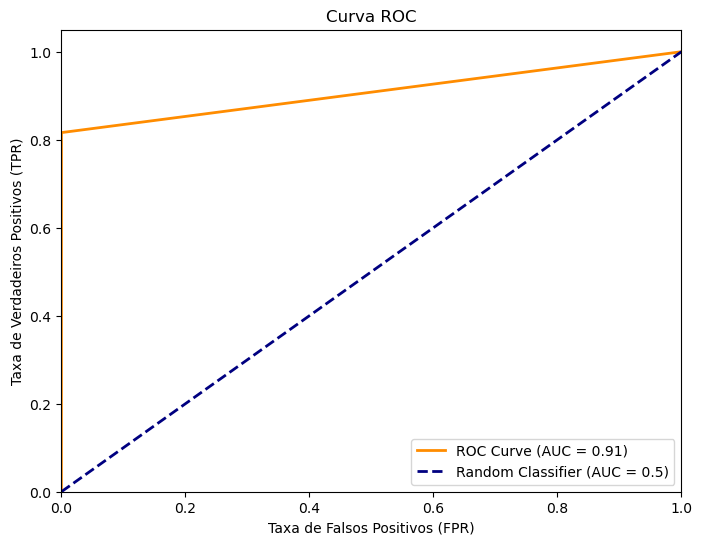

In [29]:
# Criando um gráfico para visualizar melhor a métrica

# Calcula a curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_teste, previsoes_teste)

# Calcula a AUC (Você já fez isso, mas incluí aqui para completude)
roc_auc = metrics.auc(fpr, tpr)

# Plota a curva ROC
plt.figure(figsize=(8, 6))
plt.title('Curva ROC')
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Rótulo da curva ROC
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)') # Rótulo da linha base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.show()

O gráfico da curva ROC mostra um excelente desempenho do modelo. A curva laranja está bem próxima do canto superior esquerdo do gráfico, indicando uma alta capacidade de discriminação entre as classes.

Vamos aos pontos principais:

AUC = 0.91: Este valor é muito bom. Uma AUC de 0.91 significa que o modelo tem 91% de chance de classificar corretamente um exemplo positivo como positivo e um exemplo negativo como negativo. Valores de AUC acima de 0.9 são geralmente considerados excelentes.

Curva próxima ao ideal: A curva ROC ideal seria uma linha que sobe verticalmente até 1 no eixo y (TPR) e depois segue horizontalmente até o ponto (1, 1). A curva do modelo se aproxima bastante desse ideal, demonstrando que consegue atingir altas taxas de verdadeiros positivos com baixas taxas de falsos positivos em grande parte da faixa de limiares.

Comparação com a linha base: A linha pontilhada azul representa a performance de um classificador aleatório (AUC = 0.5). A curva do modelo está significativamente acima dessa linha base, confirmando que ele é muito melhor do que um classificador aleatório.

In [30]:
# Salva o modelo em disco
dump(pipe_final, 'modelo_final.joblib')

['modelo_final.joblib']

### <font color='blue'>Deploy do Modelo e Detecção de Fraudes em Novas Transações</font>

In [31]:
# Carrega os novos dados de uma transação
novos_dados = pd.read_excel('novos_dados.xlsx')

In [32]:
# Dados no formato original
novos_dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,45223,-222654077921984,0.767662,-0.70268,-0.774182,-124948626781992,-129925218704188,0.270929,0.986424,-0.131979,-116257368174991,-141112617917258,-0.126046,-123266486718071,112451456684942,-0.586061,0.369409,0.253028,-0.408064,-0.399224,-0.546009,0.108499,0.107043,0.258549,0.436862,-0.422302,0.828545,-0.178927,-0.225724,98.8


In [33]:
# Ajustando o nome das colunas
novos_dados.columns = [col.lower() for col in novos_dados.columns]

In [34]:
# Carrega o modelo do disco
modelo_carregado = load('modelo_final.joblib')

In [35]:
# Extrai a previsão de maior probabilidade
previsao = modelo_carregado.predict(novos_dados)

In [36]:
# Resultado
if previsao[0] == 0:
    print("Segundo o modelo, provavelmente, essa transação não representa uma Fraude.")
else:
    print("Segundo o modelo, provavelmente, essa transação pode representar uma Fraude. Acione verificação humana!")

Segundo o modelo, provavelmente, essa transação não representa uma Fraude.


### <font color='blue'>Sistema e Versões dos Pacotes</font>

In [37]:
%reload_ext watermark
%watermark -v -m
%watermark --iversions

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 186 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

pandas    : 2.2.2
sklearn   : 1.4.2
matplotlib: 3.8.4
joblib    : 1.4.2
seaborn   : 0.13.2
numpy     : 1.26.4
xgboost   : 2.1.1

